**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Tamanho da imagem :  (3692, 2812)
Imagem 300 dpi: 
[[245. 245. 245. ... 245. 245. 245.]
 [245. 245. 245. ... 245. 245. 245.]
 [245. 245. 245. ... 245. 245. 245.]
 ...
 [245. 245. 245. ... 246. 246. 246.]
 [245. 245. 245. ... 246. 246. 246.]
 [245. 245. 245. ... 246. 246. 246.]]


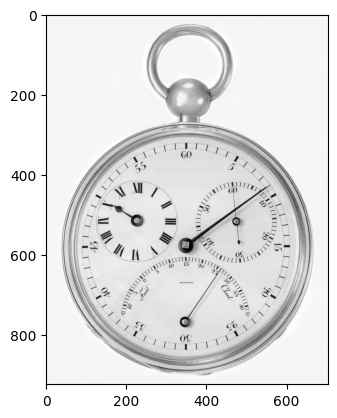

In [3]:
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255);

print('Tamanho da imagem : ',img.shape)
# convertendo para 300dpi
# Como dpi = qtd_pixel/polegadas, tem-se que 1250 ~= 3692/2.96 e 1250 ~= 2812/2.25
# Para converter em 300, é necessário redimensionar a matriz. 
# Descobrindo as dimensões:
#   Como a redução de 1250 para 300 é de, aproximadamente 1/4, basta dividir as dimensões da matriz   3962x2812 por 4 e, assim, teremos as dimensões da nova matriz
# 3962/4 = 923
# 2812/4 = 703
# Logo, a imagem com 300 de dpi terá as dimensões de 923x703

arrayImg = np.asarray(img)

medias = np.zeros((923, 703))

# Vamos utilizar o algoritmo da média para converter em 300 dpi
# Divide-se a matriz original em matrizes menores com dimensões com tamanho equivalente à proporcão, ou seja, nesse caso as mini-matrizes terão dimensões 4x4 
for i in range(923):
    for j in range(703):
        matriz_4x4 = arrayImg[i*4:(i+1)*4, j*4:(j+1)*4]
        media = np.mean(matriz_4x4)
        medias[i, j] = media

im = Image.fromarray(medias)
im.save("relogio300dpi.tif")

print("Imagem 300 dpi: ")
img300 = plt.imread("relogio300dpi.tif")
plt.imshow(img300)

print(medias)

Tamanho da imagem :  (3692, 2812)
Imagem 300 dpi: 


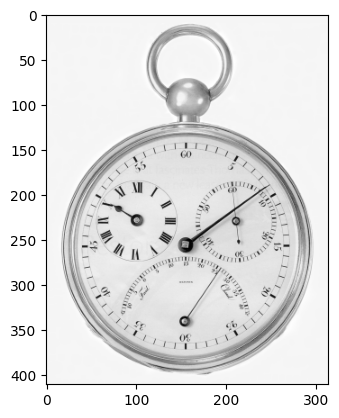

In [ ]:
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);

print('Tamanho da imagem : ',img.shape)
# convertendo para 150dpi

linhas = img.shape[0]
colunas = img.shape[1];

arrayImg = np.asarray(img)


medias = np.zeros((411, 313))


for i in range(411):
    for j in range(313):
        matriz9x9 = arrayImg[i*9:(i+1)*9, j*9:(j+1)*9]
        media = np.mean(matriz9x9)
        medias[i, j] = media

im = Image.fromarray(medias)
im.save("relogio150dpi.tif")

print("Imagem 300 dpi: ")
img150 = plt.imread("relogio150dpi.tif")
plt.imshow(img150)


Tamanho da imagem :  (3692, 2812)


c:\Users\lazar\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\lazar\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Imagem 72 dpi: 


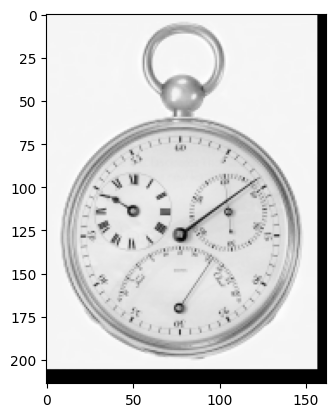

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);


print('Tamanho da imagem : ',img.shape)
# convertendo para 72dpi

arrayImg = np.asarray(img)


medias = np.zeros((214, 162))

for i in range(214):
    for j in range(162):
        matriz18x18 = arrayImg[i*18:(i+1)*18, j*18:(j+1)*18]
        media = np.mean(matriz18x18)
        medias[i, j] = media

im = Image.fromarray(medias)
im.save("relogio72dpi.tif")

print("Imagem 72 dpi: ")
img72 = plt.imread("relogio72dpi.tif")
plt.imshow(img72)


2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Imagem original: 
Tamanho da imagem:  (452, 374, 3)


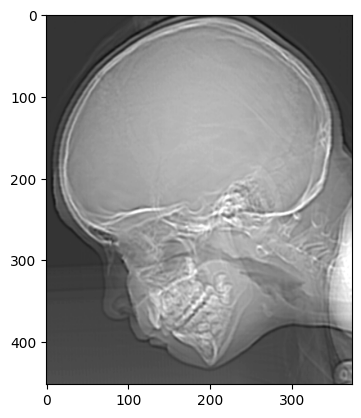

In [ ]:

import cv2
import matplotlib.pyplot as plt
import numpy as np


print("Imagem original: ")
img = cv2.imread("ctskull-256.tif")
plt.imshow(img)

print("Tamanho da imagem: ", img.shape)


Tamanho da imagem:  (452, 374)
Valor maximo da imagem:  255
Valor maximo da imagem:  0


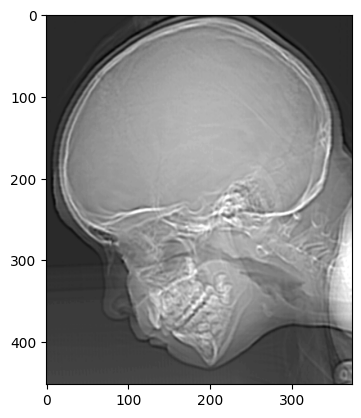

In [3]:
# imagem usando 7 bits
# imagem com 128 níveis de cinza
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

print("Tamanho da imagem: ", img.shape)

arrayImg = np.asarray(img)

newImg = np.zeros((img.shape[0], img.shape[1]))

newImg = np.floor(arrayImg / 2)  #pois (2^8)/(2^k) k = numero de bits
""" for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        newImg[i, j] = arrayImg[i, j] // 2  #pois (2^8)/(2^k) k = numero de bits
 """                                            # para k = 7 tem-se (2^8)/(2^7) = 2^1 = 2

normalizedImg = 255 * (newImg - newImg.min()) // (newImg.max() - newImg.min())

im = Image.fromarray(normalizedImg)

im.save("ctskull-128.tif")

img128 = plt.imread("ctskull-128.tif")
plt.imshow(img128)

print("Valor maximo da imagem: ", np.max(img128))
print("Valor maximo da imagem: ", np.min(img128))

Tamanho da imagem:  (452, 374)
Valor maximo da imagem:  255
Valor maximo da imagem:  0


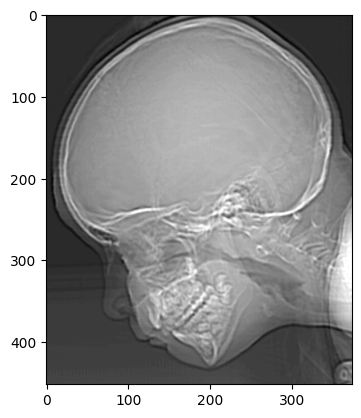

In [ ]:
# imagem usando 6 bits
# imagem com 64 niveis de cinza
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)


print("Tamanho da imagem: ", img.shape)

arrayImg = np.asarray(img)
newImg = np.zeros((img.shape[0], img.shape[1]))


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
       newImg[i, j] = arrayImg[i, j] // 4  #pois (2^8)/(2^k) k = numero de bits
                                            # para k = 6 tem-se (2^8)/(2^6) = 2^2 = 4
normalizedImg = 255 * (newImg - newImg.min()) // (newImg.max() - newImg.min())

im = Image.fromarray(normalizedImg)
im.save("ctskull-64.tif")

img64 = plt.imread("ctskull-64.tif")
plt.imshow(img64)

print("Valor maximo da imagem: ", np.max(img64))
print("Valor maximo da imagem: ", np.min(img64))


Tamanho da imagem:  (452, 374)
Valor maximo da imagem:  255
Valor maximo da imagem:  12


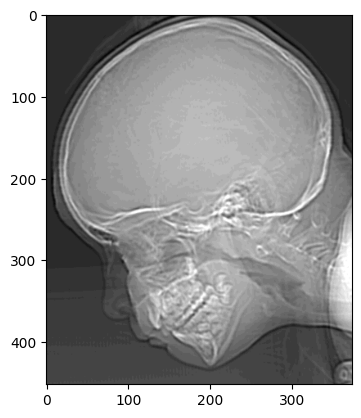

In [ ]:
# imagem usando 5 bits
#imagem de 32 níveis de cinza
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)
#plt.imshow(img)

print("Tamanho da imagem: ", img.shape)

arrayImg = np.asarray(img)
newImg = np.zeros((img.shape[0], img.shape[1]))


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        newImg[i, j] = arrayImg[i, j] // 8  #pois (2^8)/(2^k) k = numero de bits
                                            # para k = 5 tem-se (2^8)/(2^5) = 2^3 = 8

normalizedImg = 255 * (newImg - newImg.min()) // (newImg.max() - newImg.min())
im = Image.fromarray(normalizedImg)
im.save("ctskull-32.tif")

img32 = plt.imread("ctskull-32.tif")
plt.imshow(img32)

print("Valor maximo da imagem: ", np.max(img32))
print("Valor maximo da imagem: ", np.min(img32))

Tamanho da imagem:  (452, 374)
Valor maximo da imagem:  255
Valor maximo da imagem:  0


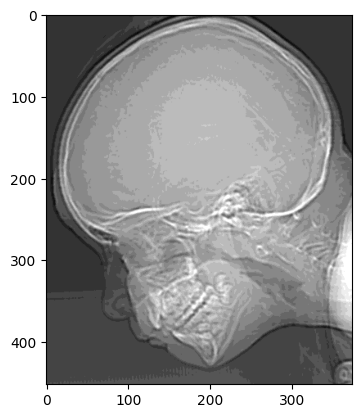

In [ ]:
#imagem utilizadno 4 bits
#imagem 16 níveis de cinza
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

print("Tamanho da imagem: ", img.shape)

arrayImg = np.asarray(img)
newImg = np.zeros((img.shape[0], img.shape[1]))


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        newImg[i, j] = arrayImg[i, j] // 16 #pois (2^8)/(2^k) k = numero de bits
                                            # para k = 4 tem-se (2^8)/(2^4) = 2^4 = 16
normalizedImg = 255 * (newImg - newImg.min()) // (newImg.max() - newImg.min())

im = Image.fromarray(normalizedImg)
im.save("ctskull-16.tif")

img16 = plt.imread("ctskull-16.tif")
plt.imshow(img16)

print("Valor maximo da imagem: ", np.max(img16))
print("Valor maximo da imagem: ", np.min(img16))

Tamanho da imagem:  (452, 374)
Valor maximo da imagem:  255
Valor maximo da imagem:  0


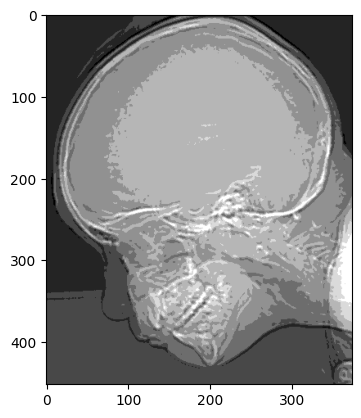

In [ ]:
#imagem usando 3 bits
#imagem 8 níveis de cinza
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

print("Tamanho da imagem: ", img.shape)

arrayImg = np.asarray(img)
newImg = np.zeros((img.shape[0], img.shape[1]))


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        newImg[i, j] = arrayImg[i, j] // 32 #pois (2^8)/(2^k) k = numero de bits
                                            # para k = 3 tem-se (2^8)/(2^3) = 2^5 = 32
normalizedImg = 255 * (newImg - newImg.min()) // (newImg.max() - newImg.min())

im = Image.fromarray(normalizedImg)
im.save("ctskull-8.tif")

img8 = plt.imread("ctskull-8.tif")
plt.imshow(img8)

print("Valor maximo da imagem: ", np.max(img8))
print("Valor maximo da imagem: ", np.min(img8))

Tamanho da imagem:  (452, 374)
Valor maximo da imagem:  255
Valor maximo da imagem:  0


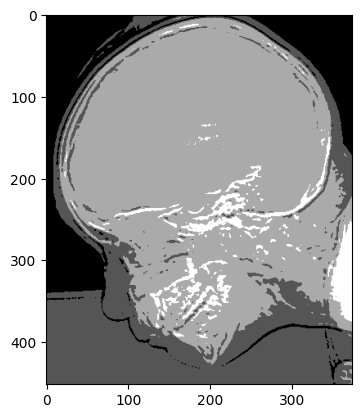

In [ ]:
#imagem usando 2 bits
# 4 niveis de cinza

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

print("Tamanho da imagem: ", img.shape)


arrayImg = np.asarray(img)
newImg = np.zeros((img.shape[0], img.shape[1]))


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        newImg[i, j] = arrayImg[i, j] // 64 #pois (2^8)/(2^k) k = numero de bits
                                            # para k = 2 tem-se (2^8)/(2^2) = 2^6 = 64 
normalizedImg = 255 * (newImg - newImg.min()) // (newImg.max() - newImg.min())

im = Image.fromarray(normalizedImg)
im.save("ctskull-4.tif")

img4 = plt.imread("ctskull-4.tif")
plt.imshow(img4)

print("Valor maximo da imagem: ", np.max(img4))
print("Valor maximo da imagem: ", np.min(img4))

Tamanho da imagem:  (452, 374)
Valor maximo da imagem:  255
Valor maximo da imagem:  0


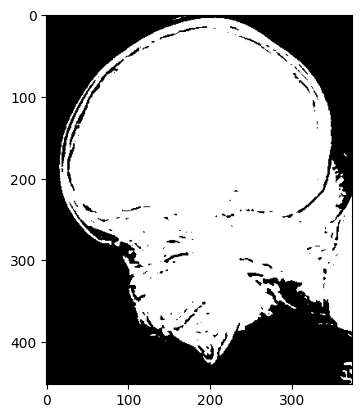

In [ ]:
#imagem usando 1 bit
#imagem 2 níveis de cinza
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

print("Tamanho da imagem: ", img.shape)


arrayImg = np.asarray(img)
newImg = np.zeros((img.shape[0], img.shape[1]))


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        newImg[i, j] = arrayImg[i, j] // 128 #pois (2^8)/(2^k) k = numero de bits => para 
                                            # k = 1 tem-se (2^8)/(2^1) = 2^7 = 128 
normalizedImg = 255 * (newImg - newImg.min()) // (newImg.max() - newImg.min())

im = Image.fromarray(normalizedImg)
im.save("ctskull-2.tif")

img2 = plt.imread("ctskull-2.tif")
plt.imshow(img2)

print("Valor maximo da imagem: ", np.max(img2))
print("Valor maximo da imagem: ", np.min(img2))